# Lab Customer Analysis Case Study

## import libraries

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [414]:
# load data and store in variable
file1 = pd.read_csv("Data/file1.csv")
file2 = pd.read_csv("Data/file2.csv")
file3 = pd.read_csv("Data/file3.csv")

In [415]:
# create functions to rename and sort columns
# make columns lower case
def make_columns_lower_case(df):
    df.columns=[i.lower() for i in df.columns]
    return df

# replace space " " with underscore "_"
def replace_space(df):
    df.columns=[i.replace(" ","_") for i in df.columns]
    return df

# lower and replace space
def columns_lower_no_space(df):
    """ 
    Info: Columns of DataFrame will be manipulated: 
            1. All letters will be lowered.
            2. Spaces " " will be replaced with underscores "_"
    """
    make_columns_lower_case(df)
    replace_space(df)
    return df

In [416]:
# modify column: lower letters and replace space
file1 = columns_lower_no_space(file1)
file2 = columns_lower_no_space(file2)
file3 = columns_lower_no_space(file3)

In [417]:
file1_strip = file1.customer_lifetime_value.str.rstrip('!?% \n\t').astype("float64") /100
file1_strip.describe()

count     1068.000000
mean      7936.902593
std       6434.784103
min       2004.350700
25%       4034.079950
50%       5881.742350
75%       8962.871975
max      58166.553500
Name: customer_lifetime_value, dtype: float64

In [418]:
file2_strip = file2.customer_lifetime_value.str.rstrip('!?% \n\t').astype("float64") /100
file2_strip.describe()

count      992.000000
mean      7651.493931
std       6214.652859
min       2004.350700
25%       3924.119200
50%       5627.053750
75%       8690.526075
max      49221.430700
Name: customer_lifetime_value, dtype: float64

In [419]:
file3.customer_lifetime_value.describe()

count     7070.000000
mean      8028.803803
std       6942.419253
min       1898.007675
25%       3981.073024
50%       5782.095838
75%       8989.995803
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [420]:
# compare the columns
pd.DataFrame([file1.columns,file2.columns,file3.columns])

,0,1,2,3,4,5,6,7,8,9,10
0,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount,policy_type,vehicle_class
2,customer,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class


In [421]:
#Rename/Match column-names
file1.rename(columns={"st" : "state"}, inplace=True)
file2.rename(columns={"st" : "state"}, inplace=True)

In [422]:
# check column names again
pd.DataFrame([file1.columns,file2.columns,file3.columns])

,0,1,2,3,4,5,6,7,8,9,10
0,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount,policy_type,vehicle_class
2,customer,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class


In [423]:
# Concat files

df = pd.concat([file1,file2,file3],ignore_index = True)
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   state                      9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   education                  9137 non-null   object 
 4   customer_lifetime_value    9130 non-null   object 
 5   income                     9137 non-null   float64
 6   monthly_premium_auto       9137 non-null   float64
 7   number_of_open_complaints  9137 non-null   object 
 8   policy_type                9137 non-null   object 
 9   vehicle_class              9137 non-null   object 
 10  total_claim_amount         9137 non-null   float64
dtypes: float64(3), object(8)
memory usage: 1.0+ MB


In [425]:
round(df.isna().sum()/len(df),4)*100


customer                     24.32
state                        24.32
gender                       25.34
education                    24.32
customer_lifetime_value      24.38
income                       24.32
monthly_premium_auto         24.32
number_of_open_complaints    24.32
policy_type                  24.32
vehicle_class                24.32
total_claim_amount           24.32
dtype: float64

# Start cleaning Data
## Drop empty lines (all nan)

In [426]:
df = df.dropna(how="all")
df = df.reset_index().drop(columns={"index"})
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
9132,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
9133,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
9134,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
9135,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Clean data of individual columns
### Clean custome lifetime value:
    - create function 
        - identify "%".
        - strip %
        - make float/numeric
        - divide by 100
    - imply function on column customer_lifetime_value

In [427]:
# create function to identify and strip %. turn to float/numeric and divide by 100
def clean_percentage(number):
    if type(number) in [float,int]:
        return number
    else:
        if "%" in number:
            return pd.to_numeric(number.rstrip("%"))/100
        else: 
            try:
                return pd.to_numeric(number)
            except ValueError:
                return number

# test function
# list(map(clean_percentage,[100,200.0,"300","400%","sdf"]))

In [428]:
## apply clean_percentage on customer_lifetime_value

df["customer_lifetime_value"] = list(map(clean_percentage, df["customer_lifetime_value"]))

In [429]:
df.customer.describe()

count        9137
unique       9056
top       QD28391
freq            2
Name: customer, dtype: object

In [430]:
def compare_duplicates( df = df, column = None  , amount = 10):
    ''' 
    compare_duplicates( DataFrame = df, column = none, amount = 10)
    
    column:     column to check for duplicated, if None > check all columns
    amount:     show first first amount of rows
    '''

    try:
        return df.loc[df.duplicated(subset=column, keep=False)].sort_values(by=column).head(amount)
    except KeyError:
        print("No duplicates")

In [431]:
compare_duplicates(df, "customer", 60)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
2888,AC40767,Washington,M,Bachelor,2497.808174,68041.0,64.0,0,Personal Auto,Two-Door Car,165.570243
741,AC40767,Washington,M,Bachelors,2497.808200,68041.0,6464.0,1/0/00,Personal Auto,Two-Door Car,165.570243
1706,AI49712,Washington,F,High School or Below,2593.897900,0.0,72.0,1/0/00,Personal Auto,Four-Door Car,345.600000
3592,AI49712,Washington,F,High School or Below,2593.897887,0.0,72.0,0,Personal Auto,Four-Door Car,345.600000
416,AX86150,Washington,M,High School or Below,2656.713100,62777.0,67.0,1/0/00,Personal Auto,Two-Door Car,101.288069
2086,AX86150,Washington,M,High School or Below,2656.713092,62777.0,67.0,0,Personal Auto,Two-Door Car,101.288069
2442,AY18433,Washington,F,High School or Below,27382.818930,45473.0,76.0,0,Special Auto,Two-Door Car,188.938397
884,AY18433,Washington,F,High School or Below,27382.818900,45473.0,76.0,1/0/00,Special Auto,Two-Door Car,188.938397
1373,BE61743,Washington,M,Bachelor,4109.793600,86657.0,103.0,1/0/00,Personal Auto,Sports Car,316.227946
3400,BE61743,Washington,M,Bachelor,4109.793608,86657.0,103.0,0,Personal Auto,Sports Car,316.227946


In [432]:
compare_duplicates()

No duplicates


## Analyse duplicates
- customer duplicates are almost the same
- second duplicate is cleaner than the first.
- keep second
- How to correct "Number of open complaints":
    - 1/0/00 => 0
    - 1/1/00 => 1
    - 1/3/00 => 3
    - etc.


In [433]:
## Show how many NAN in column customer:
df[df["customer"].isna()== True]

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount


In [434]:
## As there are  no nan-values we can
## Drop customer duplicates and keep last:
df = df.drop_duplicates(subset = "customer", keep="last")
df.customer.describe()

count        9056
unique       9056
top       RB50392
freq            1
Name: customer, dtype: object

In [435]:
## we get rid of column "customer"
#df["columns"] = 
df = df.drop("customer", axis=1)
df.head(1)

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934


## Clean number of open complaints

In [436]:
# check count of unique values
df.number_of_open_complaints.value_counts()

0         5629
1/0/00    1561
1          765
2          283
1/1/00     236
3          230
4          119
1/2/00      91
1/3/00      58
5           44
1/4/00      29
1/5/00      11
Name: number_of_open_complaints, dtype: int64

In [437]:
## replace value with value in positon 2 of str modified to int
df.loc[:,"number_of_open_complaints"] = list(map(lambda x: int(x[2]) if (type(x) == str and len(x)>2) else x, df.loc[:,"number_of_open_complaints"]))

In [438]:
# check values after function
df.number_of_open_complaints.value_counts()

0    7190
1    1001
2     374
3     288
4     148
5      55
Name: number_of_open_complaints, dtype: int64

## Filtering data and Correcting typos 
### Filter the data in state and gender column to standardize the texts in those columns

#### Clean Gender Column


In [439]:
df.gender.unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [440]:
# check gender values
df.gender.value_counts()

F         4518
M         4329
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [441]:
# def function to rename values

def rename_gender_values(x):
    if type(x) == str:
        if x[0] in ["F","f"]:
            return "F"
        elif x[0] in ["m","M"]:
            return "M"
        else:
            return "U"
    else:
        return "U"
# Test function
#list(map(rename_gender_values, ["F","femle","mal","M",1,"sokl"]))

In [442]:
df.gender = df.gender.apply(rename_gender_values)
df.gender.value_counts()

F    4565
M    4369
U     122
Name: gender, dtype: int64

#### cealn state column

In [443]:
## check state values
df.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA'], dtype=object)

In [444]:
df.state.value_counts()

California    3030
Oregon        2601
Arizona       1629
Nevada         882
Washington     690
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

In [445]:
# def function to rename values
def rename_state_values( x , dict ):
    """ 
    rename_state_values( x , dict ):
        x:  argument to test/rename
        dict: argument to compared to
            - keys of dict are valiable values
            - values of dict are likely missspelled strings
    Example:
        replace_state_dic = {'Washington' : ['WA'], 'Arizona' : ['AZ','Ariznoa']}
        list(map(lambda x: rename_state_values(x,replace_state_dic), ["WA","Arizona","AZ","Arinoa"]))

        Output:
        ['Washington', 'Arizona', 'Arizona', None]

    Example to use on df:
    replace_state_dic = {'Washington' : ['WA',"W"], 'Arizona' : ["AZ","Ari"] , 'Nevada' : [] , 'California': ["cali","CA","Cali"] , 'Oregon' : []}
    df.state = list(map(lambda x: rename_state_values(x,replace_state_dic), df.state))

    Value_counts:
    before: California    3030
            Oregon        2601
            Arizona       1629
            Nevada         882
            Washington     690
            Cali           120
            AZ              74
            WA              30

    after:  California    3150
            Oregon        2601
            Arizona       1703
            Nevada         882
            Washington     720
    """
    if x in dict.keys():
        return x
    for key, list_substitutes in dict.items():
        if x in list_substitutes:
            return key
    return

In [446]:
# Test function
#list(map(lambda x: rename_state_values(x,replace_state_dic), ["Cali","WA","Arizona","California","Cali","AZ","W","Ari","AZ","Cali",1,"sokl","Cali"]))

In [447]:
# create Dic with valiable values for state as keys and and likely missspelled values as a list of values
replace_state_dic = {'Washington' : ['WA',"W"], 'Arizona' : ["AZ","Ari"] , 'Nevada' : [] , 'California': ["cali","CA","Cali"] , 'Oregon' : []}

# use rename funcion on df.state
df.state = list(map(lambda x: rename_state_values(x,replace_state_dic), df.state))
df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     720
Name: state, dtype: int64

## Replacing null values
### Replace missing values with means of the column (for numerical columns)

### Overview of Nullvalues and NaN:

In [448]:
# calculate percentage of NaN values and zero values in columns
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})

,% NaN,% 0.0
state,0.00,0.00
gender,0.00,0.00
education,0.00,0.00
customer_lifetime_value,0.03,0.00
income,0.00,25.23
monthly_premium_auto,0.00,0.00
number_of_open_complaints,0.00,79.39
policy_type,0.00,0.00
vehicle_class,0.00,0.00
total_claim_amount,0.00,0.00


In [449]:
# have a look at income values
df.income.value_counts()
#df.income

0.0        2285
95697.0      12
61108.0       7
20978.0       7
25370.0       7
           ... 
65448.0       1
89205.0       1
67163.0       1
46593.0       1
21941.0       1
Name: income, Length: 5655, dtype: int64

In [450]:
# calculate mean of income without zero
mean_income_no_zero = df.income.sum()/(len(df.income)-2285) # entered count of zeros manually

In [451]:
# replace 0.0-values with mean_income_no_zero
df.income = list(map(lambda x: mean_income_no_zero if x == 0.0 else x, df.income))

#### Replace NaN values in column customer_lifetime_value

In [452]:
# have a look at customer_lifetime_value values
# df.customer_lifetime_value.value_counts()
#df.isna().sum().loc["customer_lifetime_value"]
df.customer_lifetime_value

0                NaN
1        6979.535900
2       12887.431700
3        7645.861800
5        8256.297800
            ...     
9132    23405.987980
9133     3096.511217
9134     8163.890428
9135     7524.442436
9136     2611.836866
Name: customer_lifetime_value, Length: 9056, dtype: float64

In [453]:
# calculate mean of "customer_lifetime_value" without zero
mean_customer_lifetime_value_no_zero = (df
                                                .customer_lifetime_value
                                                .sum()
                                            /(len(df.
                                                    customer_lifetime_value)
                                        -(df
                                            .isna()
                                            .sum()
                                            .loc["customer_lifetime_value"])))
mean_customer_lifetime_value_no_zero

7986.4214993021105

In [454]:
df.customer_lifetime_value = df.customer_lifetime_value.fillna(mean_customer_lifetime_value_no_zero)

In [455]:
# have a look at customer_lifetime_value values
# df.customer_lifetime_value.value_counts()
#df.isna().sum().loc["customer_lifetime_value"]
df.customer_lifetime_value

0        7986.421499
1        6979.535900
2       12887.431700
3        7645.861800
5        8256.297800
            ...     
9132    23405.987980
9133     3096.511217
9134     8163.890428
9135     7524.442436
9136     2611.836866
Name: customer_lifetime_value, Length: 9056, dtype: float64

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

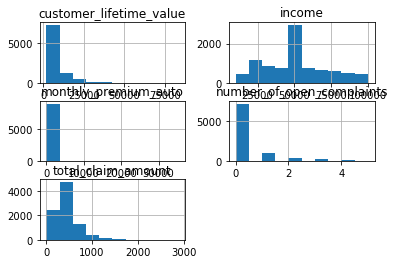

In [456]:
df.hist()

<AxesSubplot:>

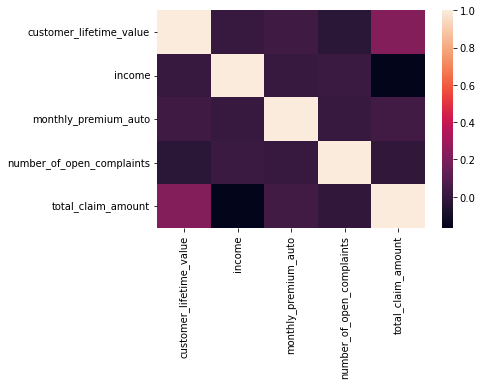

In [457]:
sns.heatmap(df.corr())